In [5]:
import csv
import pandas as pd
import datetime

In [6]:
temp = pd.read_csv(file_dir)

In [11]:
temp.loc[~temp['Unnamed: 1'].isna()].iloc[0][temp.columns[0]]

'309077880\t"1227-A"\t"2015/03/16 19:59:00"\t"941976"\t"Transfer from Prison'

In [4]:
file_dir = '../Data/ADT_Tranfer_Out_Data_2019.csv'

# ind = 0
# with open(file_dir) as csvfile:

#     readCSV = csv.reader(csvfile, delimiter=',')
#     for row in readCSV:
#         print(row)
#         print(row[0])
#         print(row[0],row[1],row[2],)

In [2]:
a = [2]

In [30]:
data = '../Data/2020-01-10Census and Surgical Admits and Scheduled 2.csv'
df = pd.read_csv(data, parse_dates = ['Effective Date/Time'])

/Users/Teng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
df = df.loc[df['Effective Date/Time']>= datetime.date(year = 2016, month = 1, day = 1)]

/Users/Teng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [41]:
def dep_trans(dep):
    if 'PCU' in dep:
        return 'Acute'
    elif 'CVICU' in dep:
        return 'CVICU220'
    elif 'PICU'in dep:
        return 'PICU'
    else:
        return dep

df['Dept New'] = df['Dept Abbrev'].apply(dep_trans)

In [38]:
df['year'] = df['Effective Date/Time'].dt.year
df['month'] = df['Effective Date/Time'].dt.month

df_temp = df.loc[df['Dept New'].isin(['Acute', 'CVICU220', 'PICU', 'NICU270', 'PICU'])]
df_temp = df_temp.groupby(['Dept New', 'year', 'month']).size().rename('N_days').reset_index()

In [39]:
import calendar

def cal_adc(row):
    return row['N_days']/calendar.monthlen(row['year'],row['month'])

df_temp['ADC'] = df_temp.apply(cal_adc, axis = 1)

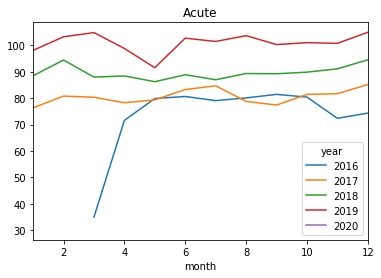

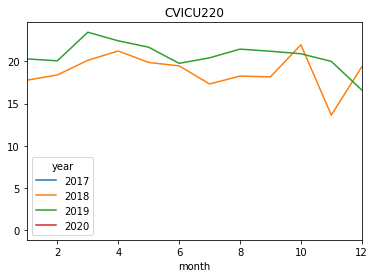

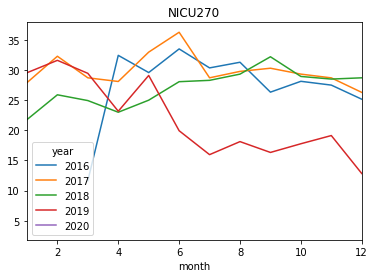

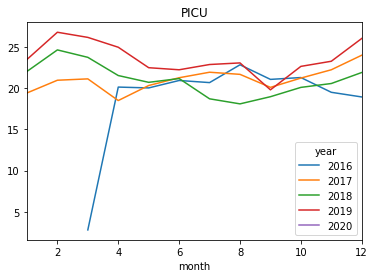

In [40]:
import matplotlib.pyplot as plt
depts = df_temp['Dept New'].unique()

for dep in depts:
    temp = df_temp.loc[df_temp['Dept New'] == dep].sort_values('month').pivot(index = 'month', 
                                                                           columns='year', 
                                                                           values='ADC')
    temp.plot()
    plt.title(dep)